In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from __future__ import print_function, division
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
from torch.autograd import Variable
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
from torch.utils.data import Dataset, DataLoader

In [ ]:
trans = transforms.Compose([transforms.Resize((224,224)),
                           transforms.ToTensor(),
                           transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
                           ])

trainset = torchvision.datasets.ImageFolder(root = "/content/drive/MyDrive/Colab Notebooks/ml2021/data04/Train",
                                           transform = trans)

In [ ]:
train_loader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True)

In [ ]:
trans = transforms.Compose([transforms.Resize((224,224)),
                           transforms.ToTensor(),
                           transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
                           ])

validationset = torchvision.datasets.ImageFolder(root = "/content/drive/MyDrive/Colab Notebooks/ml2021/data04/validation",
                                           transform = trans)

In [ ]:
val_loader = torch.utils.data.DataLoader(validationset, batch_size=4,
                                          shuffle=True)

In [ ]:
trans = transforms.Compose([transforms.Resize((224,224)),
                           transforms.ToTensor(),
                           transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
                           ])

testset = torchvision.datasets.ImageFolder(root = "/content/drive/MyDrive/Colab Notebooks/ml2021/data04/Test",
                                           transform = trans)

In [ ]:
test_loader = torch.utils.data.DataLoader(testset, batch_size = 4,
                                         shuffle = True)

In [ ]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # 갱신이 될 때까지 잠시 기다립니다.

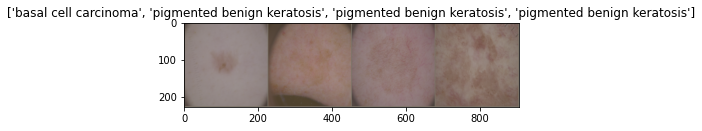

In [ ]:
inputs, classes = next(iter(train_loader))
class_names = trainset1.classes
# 배치로부터 격자 형태의 이미지를 만듭니다.
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

In [ ]:
import torchvision.models as models
net=models.resnet50(pretrained = True)

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

In [ ]:
num_classes = 4
num_ftrs = net.fc.in_features
net.fc = nn.Linear(num_ftrs, num_classes)
net.cuda()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr = 0.004)

In [ ]:
for epoch in range(60):
  total = 0
  print("Training...")
  running_loss = 0.0
  correct = 0
  for i, data in enumerate(train_loader, 0):
      inputs, labels = data
      inputs, labels = inputs.cuda(), labels.cuda()
      imputs, lables = Variable(inputs.float().cuda()), Variable(labels.float().cuda())
      if i%100 == 0 :
          print("Training...",i)  
      optimizer.zero_grad()
      outputs = net(inputs)
      loss = criterion(outputs, labels)
        
      loss.backward()
      optimizer.step()
        
      max_index = outputs.max(dim=1)[1]
      correct += (max_index == labels).sum().item()
      total += labels.size(0)
      running_loss += loss.item()
      # validation


      if (epoch > 9 and epoch % 10 == 0):
        class_correct = list(0. for i in range(1000))
        class_total = list(0. for i in range(1000))
        with torch.no_grad():
            for i,data in enumerate(val_loader,0):
                images, labels = data
                images = images.cuda()
                labels = labels.cuda()
                outputs = net(images)
                _, predicted = torch.max(outputs, 1)
                c = (predicted == labels).squeeze()
                for i in range(labels.size()[0]):
                    label = labels[i].item()
                    class_correct[label] += c[i].item()
                    class_total[label] += 1
        val_acc = sum(class_correct) / sum(class_total) * 100
      else:
        val_acc = 0




      
      if i % len(train_loader) == len(train_loader) - 1:
        print('[epoc: %d, %5d] training loss: %.3f' %
              (epoch + 1, i + 1, running_loss / len(train_loader)))
  print("Training Accuracy = {}".format(100 * correct / total))


            
print('finish') 

Training...
Training... 0
Training... 100
Training... 200
Training... 300
[epoc: 1,   325] training loss: 0.793
Training Accuracy = 67.00077101002313
Training...
Training... 0
Training... 100
Training... 200
Training... 300
[epoc: 2,   325] training loss: 0.751
Training Accuracy = 70.47031611410948
Training...
Training... 0
Training... 100
Training... 200
Training... 300
[epoc: 3,   325] training loss: 0.598
Training Accuracy = 76.94680030840401
Training...
Training... 0
Training... 100
Training... 200
Training... 300
[epoc: 4,   325] training loss: 0.514
Training Accuracy = 81.18735543562066
Training...
Training... 0
Training... 100
Training... 200
Training... 300
[epoc: 5,   325] training loss: 0.458
Training Accuracy = 83.19198149575945
Training...
Training... 0
Training... 100
Training... 200
Training... 300
[epoc: 6,   325] training loss: 0.337
Training Accuracy = 86.73862760215883
Training...
Training... 0
Training... 100
Training... 200
Training... 300
[epoc: 7,   325] training 

In [ ]:
PATH = '/content/drive/MyDrive/Colab Notebooks/ml2021/Resnet50.pth'
torch.save(net.state_dict(), PATH)

In [ ]:
correct = 0
total = 0
with torch.no_grad():
    for i, data in enumerate(test_loader, 0):
        images, labels = data
        images, labels = images.float().cuda(), labels.float().cuda()

        outputs = net(images)
        max_index = outputs.max(dim=1)[1]
        total += labels.size(0)
        correct += (max_index == labels).sum().item()

print('Accuracy of Test: %d %%' % (100 * correct / total))

Accuracy of Test: 65 %
